In [1]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
from Hard_Core_BC_Hofstadter_Hamiltonian_Matrix import *
from Periodic_BC_Hofstadter_Hamiltonian_Matrix import *
# from Hofstadter_Matrix_in_k_space import *

lx= 20 , ly= 20


In [2]:
import numpy as np

In [3]:
#! Hofstadter_Matrix_in_k_space içindeki kodları buraya alınca sorunsuz çalışırken, kodları çağırdığımda hata veriyor !

import numpy as np

# Initial value of q
q=3

#Hamiltonian Matrix for Hofstadter Model (doesn't include alpha=1/2 matrix)
def HMatrix(alfa, k_x, k_y):
    M = np.zeros((q,q), dtype=complex) 
    for i in range (0, q):
        M[i,i]=2*np.cos(k_y-2*np.pi*alfa*i) 
        if i==q-1: 
            M[i,i-1]=1
        elif i==0: 
            M[i,i+1]=1
        else: 
            M[i,i-1]=1
            M[i,i+1]=1
        M[0,q-1]=np.exp(-q*1.j*k_x)
        M[q-1,0]=np.exp(q*1.j*k_x)
    return M

#Special Hofstadter Matrix Just alpha=1/2
s = 2
alpha = 1/s
def HMatrix2(alpha, k_x, k_y):
    M2 = np.zeros((s,s), dtype=complex) 
    for i in range (0, s):
        M2[i,i]=2*np.cos(k_y-2*np.pi*alpha*i) 
        if i==q-1: 
            M2[i,i-1]=1
        M2[0,s-1]=1+np.exp(-s*1.j*k_x)
        M2[s-1,0]=1+np.exp(s*1.j*k_x)
    return M2

#Set Rational to Alpha Values 
def gcd(a, b): 
    if b == 0: return a
    return gcd(b, a % b)

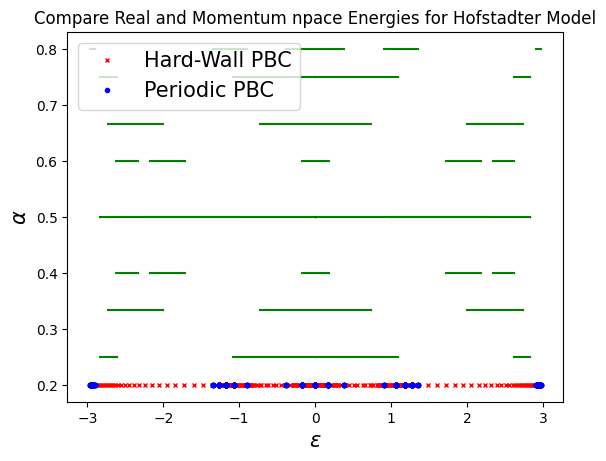

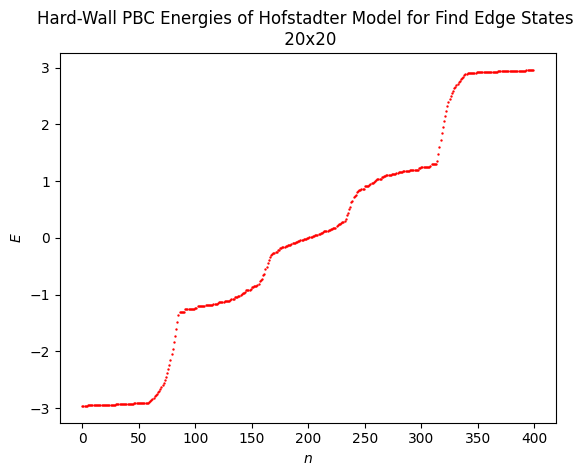

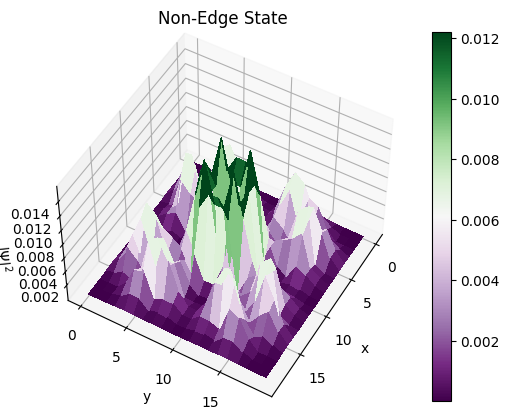

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig1, ax1 = plt.subplots()
q_max = 5
for p in range(1, q_max+1):
    for q in range(1, q_max+1):
        if q>p:
            if gcd(p, q) == 1:
                alfa = p/q
                y = np.zeros(q)
                y[:] = alfa
                
                x_1 = np.linalg.eigvalsh(HMatrix(alfa, k_x=0, k_y=0))
                x_2 = np.linalg.eigvalsh(HMatrix(alfa, k_x=np.pi/q,k_y=np.pi/q))

                for i in range(len(x_1)):
                    ax1.plot([x_1[i],x_2[i]], y[:2], '-', c='green', markersize=0.6)
  
                ax1.plot(x_1, y, 'o', x_2, y, 'o', markersize=0.1)
y2 = np.zeros(s)
y2[:] = alpha
x_3 = np.linalg.eigvalsh(HMatrix2(alpha, k_x=0, k_y=0))
x_4 = np.linalg.eigvalsh(HMatrix2(alpha, k_x=np.pi/s, k_y=np.pi/s))
for i in range(len(x_3)):
    ax1.plot([x_3[i],x_4[i]], y2[:2], '-', c='green', markersize=0.6)
ax1.plot(x_3, y2, 'o', c='black', markersize=0.1)
ax1.plot(x_4, y2, 'o', c='black', markersize=0.1)
        
plt.xlabel(r'$\epsilon$', fontsize=15)
plt.ylabel(r'$\alpha$', fontsize=15)
plt.title(r'$q=1-$'+str(q))         
#Compare momentum and real npace energies for Hofsadter 
y_real = np.zeros(L_x*L_y)
for i in range(L_x*L_y):
    y_real[i]=1/5
x_hard = np.linalg.eigvalsh(HardHMat(1/5))
x_per = np.linalg.eigvalsh(PerHMat(1/5))
ax1.plot(x_hard, y_real, 'rx', markersize=3, label="Hard-Wall PBC")
ax1.plot(x_per, y_real, 'bo', markersize=3, label="Periodic PBC")
ax1.set_title("Compare Real and Momentum npace Energies for Hofstadter Model")
ax1.legend(loc=2, prop={'size': 15}, scatterpoints=7)


fig2, ax2 = plt.subplots()
eigenValues, eigenVectors = np.linalg.eig(HardHMat(1/5))
idx = np.argsort(eigenValues)
sorted = eigenValues[idx]

x = np.arange(0, L_x*L_y, 1)
y = sorted
plt.xlabel(r'$n$')
plt.ylabel(r'$E$')
plt.title('Hard-Wall PBC Energies of Hofstadter Model for Find Edge States \n '+str(L_x)+'x'+str(L_y))
ax2.plot(x, y, 'ro', markersize=0.7)

#eigenVectors[:,i] i'th eigen-vector
#eigenVectors[:,idx[600]]

nd = np.reshape((np.absolute(eigenVectors[:,idx[20]]))**2, (L_x,L_y))

X = x_co
Y = y_co
xv, yv = np.meshgrid(X, Y)
Z = nd
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax3.plot_surface(xv, yv, Z, cmap=cm.PRGn, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
ax3.set_zlabel(r'$|\Psi|^2$')
ax3.view_init(50,30)
ax3.set_title("Non-Edge State")
plt.colorbar(surf)
#plt.savefig("fig1.svg",format='svg', dpi=1200)